<a href="https://colab.research.google.com/github/harshavardhangadila/AI-Tools/blob/main/Deepseek%20Janus/Janus_DeepSeek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gradio_client Pillow requests matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 8.8 MB/s eta 0:00:00


In [3]:
# Import libraries
from gradio_client import Client, handle_file
from PIL import Image
import matplotlib.pyplot as plt
import io

# For file upload in Colab
from google.colab import files

In [4]:
# Replace with your Hugging Face token
HF_TOKEN = ""

# Initialize the Janus Pro client (DeepSeek Janus Pro 7B)
janus_client = Client("deepseek-ai/Janus-Pro-7B", hf_token=HF_TOKEN)

Loaded as API: https://deepseek-ai-janus-pro-7b.hf.space ✔


In [6]:
def load_local_image(path):
    """Loads an image from a given local file path."""
    return Image.open(path)

def ask_about_image(image_file, query_text):

    try:
        result = janus_client.predict(
            handle_file(image_file),
            query_text,
            api_name="/multimodal_understanding"
        )
        return result
    except Exception as error:
        return f"Error during image analysis: {error}"

def generate_image_from_text(prompt_text):

    generated_images = []
    try:
        # Request image generation
        result = janus_client.predict(prompt_text, api_name="/generate_image")
        # Expecting result to be a list of dictionaries, each with an 'image' key
        if isinstance(result, list):
            for item in result:
                if isinstance(item, dict) and 'image' in item:
                    try:
                        # Open and append the generated image
                        img = Image.open(item['image'])
                        generated_images.append(img)
                    except Exception as e:
                        print(f"Warning: Unable to load one of the images: {e}")
        else:
            print("Unexpected format returned from image generation endpoint.")
    except Exception as error:
        print(f"Error during image generation: {error}")
    return generated_images

In [ ]:
## --- Part A: Image Understanding ---

Upload an image file for analysis:


Saving upload.jpeg to upload (1).jpeg
Uploaded file: upload (1).jpeg


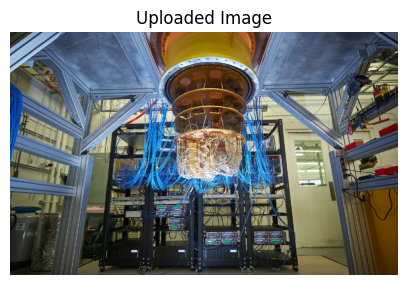


Question: Explain the Image
DeepSeek Janus Explanation: The image shows a server room with a large, complex piece of equipment at the center. This equipment appears to be a part of a data center or a high-performance computing facility. The central piece is a large, circular, metallic structure with multiple blue cables hanging from it. These cables are likely used for networking or data transfer purposes.

The structure is mounted on a metal frame and is surrounded by several racks filled with server equipment. The servers are labeled with "Dell" and have multiple blinking lights, indicating that they are powered on and active. The racks are organized in a way that maximizes space and efficiency, with cables neatly routed and connected.

The environment is well-lit and appears to be a controlled, indoor space, likely designed to maintain optimal conditions for the equipment. The overall setup suggests a high-tech, professional setting, possibly used for data processing, scientific re

In [8]:
print("Upload an image file for analysis:")
uploaded_files = files.upload()

# Get the first uploaded file name
uploaded_filename = list(uploaded_files.keys())[0]
print(f"Uploaded file: {uploaded_filename}")

# Load and display the uploaded image
input_image = load_local_image(uploaded_filename)
plt.figure(figsize=(5,5))
plt.imshow(input_image)
plt.title("Uploaded Image")
plt.axis("off")
plt.show()

# Ask a question about the image
question_text = "Explain the Image"
print(f"\nQuestion: {question_text}")
analysis_result = ask_about_image(uploaded_filename, question_text)
print("DeepSeek Janus Explanation:", analysis_result)

In [ ]:
#Part B: Text-to-Image Generation

Prompt: Imagine a futuristic quantum realm, an infinite expanse where reality bends and computation transcends known limits.At its core, a colossal quantum nexus hums with ethereal energy, its crystalline circuits pulsating with streams of entangled light.The architecture blends sleek, otherworldly structures with shimmering quantum fields: floating lattices of superconducting qubits flicker in synchronized harmony,while cascading waves of probability ripple across a vast, multi-dimensional space.Beneath a cosmic tapestry of entangled particles and shifting waveforms, every fragment of this enigmatic domain pulses with the secrets of quantum mechanics and the boundless future of computation.


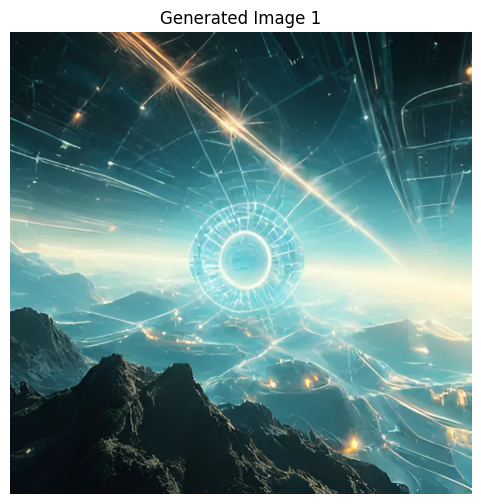

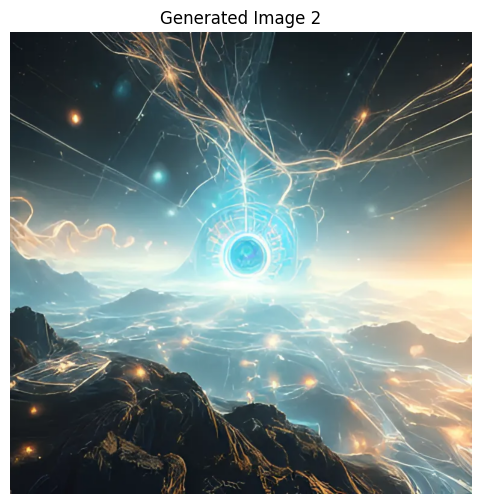

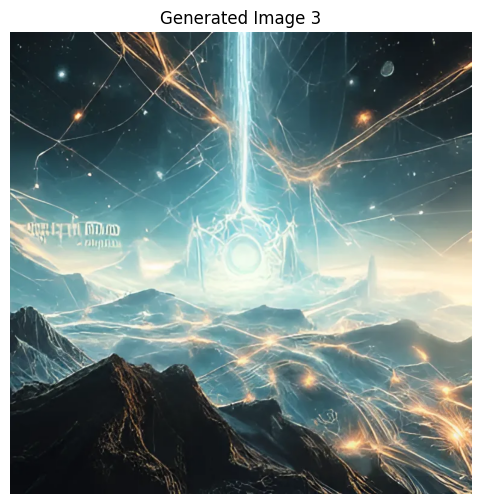

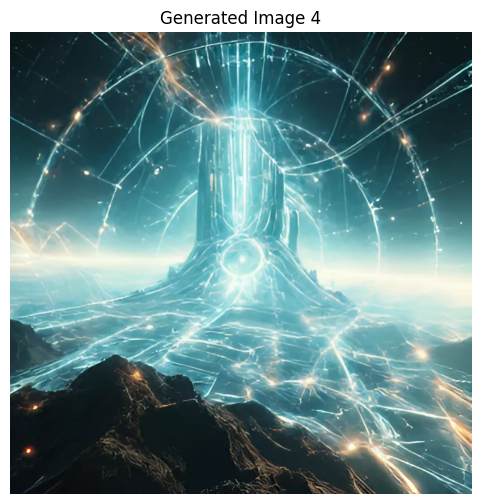

In [9]:
# --- Part B: Text-to-Image Generation ---
creative_prompt = (
"Imagine a futuristic quantum realm, an infinite expanse where reality bends and computation transcends known limits."
"At its core, a colossal quantum nexus hums with ethereal energy, its crystalline circuits pulsating with streams of entangled light."
"The architecture blends sleek, otherworldly structures with shimmering quantum fields: floating lattices of superconducting qubits flicker in synchronized harmony,"
"while cascading waves of probability ripple across a vast, multi-dimensional space."
"Beneath a cosmic tapestry of entangled particles and shifting waveforms, every fragment of this enigmatic domain pulses with the secrets of quantum mechanics and the boundless future of computation."
)
print("Prompt:", creative_prompt)

# Generate images from the prompt
images_list = generate_image_from_text(creative_prompt)
if images_list:
    for idx, gen_img in enumerate(images_list):
        plt.figure(figsize=(6,6))
        plt.imshow(gen_img)
        plt.title(f"Generated Image {idx+1}")
        plt.axis("off")
        plt.show()
else:
    print("No images were generated.")

Prompt: Imagine a boundless digital frontier, where financial sovereignty is forged in code and value flows beyond borders.At its core, a decentralized ledger glows with cryptographic integrity, each Bitcoin block an immutable testament to trustless exchange.


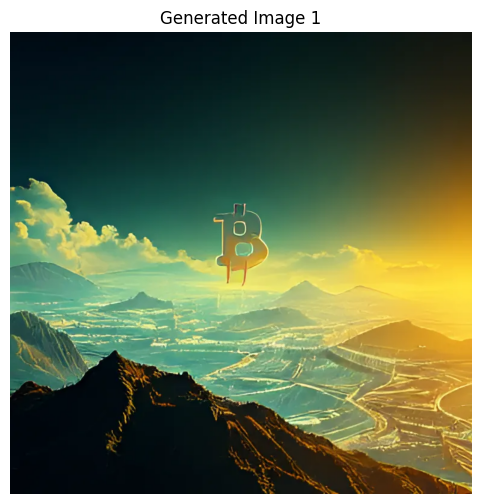

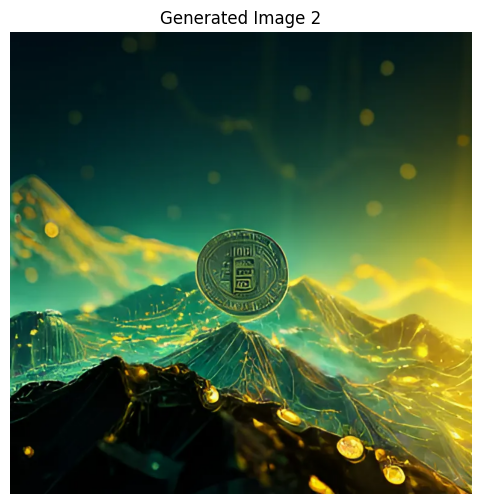

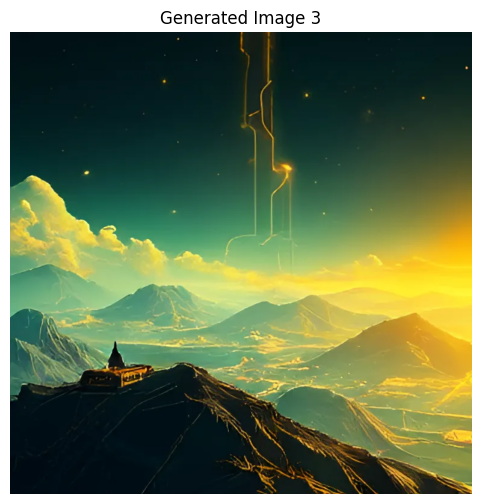

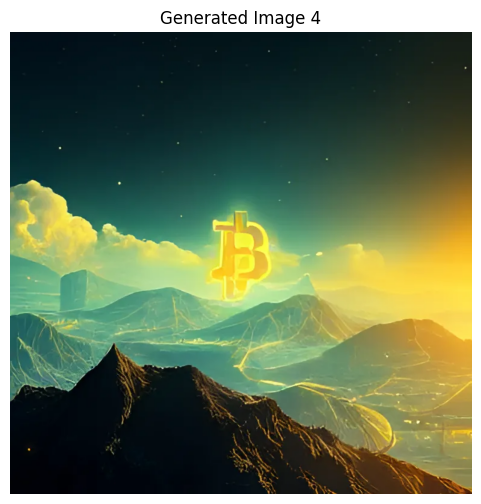

In [13]:
# --- Part B: Text-to-Image Generation ---
creative_prompt = (
  "Imagine a boundless digital frontier, where financial sovereignty is forged in code and value flows beyond borders."
"At its core, a decentralized ledger glows with cryptographic integrity, each Bitcoin block an immutable testament to trustless exchange."
)

print("Prompt:", creative_prompt)

# Generate images from the prompt
images_list = generate_image_from_text(creative_prompt)
if images_list:
    for idx, gen_img in enumerate(images_list):
        plt.figure(figsize=(6,6))
        plt.imshow(gen_img)
        plt.title(f"Generated Image {idx+1}")
        plt.axis("off")
        plt.show()
else:
    print("No images were generated.")